## Murphology

- Corresponds to lecture 5

### Murphological Image Processing

In [1]:
import matplotlib.pyplot as plt

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.set_axis_off()
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.set_axis_off()

Define Image

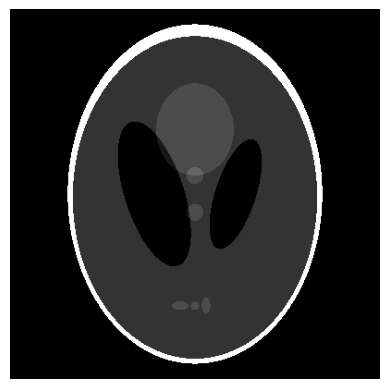

In [2]:
from skimage import data

orig_phantom = data.shepp_logan_phantom()
# Plot
plt.imshow(orig_phantom, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

Define Footprint (Structuring Element)

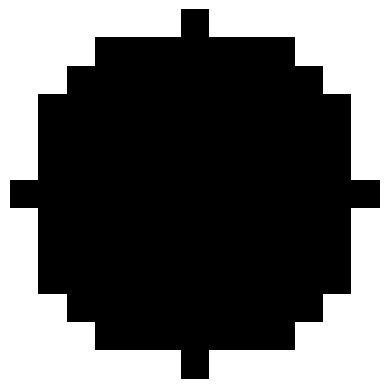

In [3]:
from skimage.morphology import disk  # noqa

footprint = disk(6)
# Plot the binary image
plt.imshow(footprint, cmap='binary')
plt.axis('off')
plt.show()

Morphological operations help us:

- Remove noise from an image
- Remove small holes form an image
- Fill the region with an image
- More operations (e.g., skeletonization or finding contours: out-of-scope)

#### Erosion Helps Remove Noise (Among Other Things):

- Put footprint on each pixel on the image

- Replace it with the lowest value under the footprint (usually black background)
  - Implies if the footprint touches the background when placed on the pixel then the pixel becomes background!
  - If it doesn't touch the background (area 100% of an object) then it's left as is

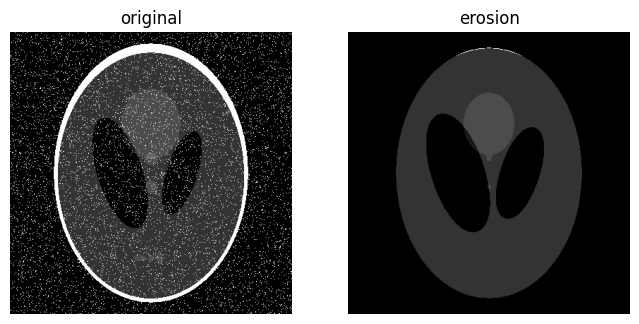

In [6]:
import skimage as ski
from skimage.morphology import erosion

img = ski.util.random_noise(orig_phantom, mode='salt', clip=True, amount=0.05)
eroded = erosion(img, footprint)
plot_comparison(img, eroded, 'erosion')

#### Dilution Helps Remove Holes (Among Other Things):

- Put footprint on each pixel on the image

- Replace it with the highest value under the footprint (usually black background)
  - Implies if the footprint touches the objectwhen placed on the pixel then the pixel becomes object!
  - If it doesn't touch the object (area 100% of an background) then it's left as is

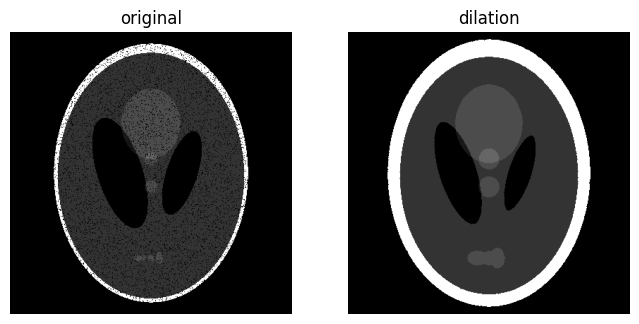

In [7]:
from skimage.morphology import dilation

img = ski.util.random_noise(orig_phantom, mode='pepper', clip=True, amount=0.1)
dilated = dilation(img, footprint)
plot_comparison(img, dilated, 'dilation')

#### Opening is Erosion followed by Dilation

Useful because erosion had side effects we may want to reverse (removed border)

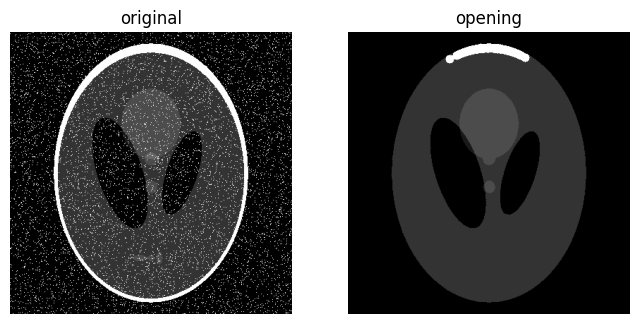

In [8]:
import skimage as ski
from skimage.morphology import opening

img = ski.util.random_noise(orig_phantom, mode='salt', clip=True, amount=0.05)
eroded = opening(img, footprint)
plot_comparison(img, eroded, 'opening')

In this case it was too strong to reverse. Try a smaller footpring.

#### Closing is Dilation followed by Erosion

Because dilation had side effects we may want to reverse (expanded border)

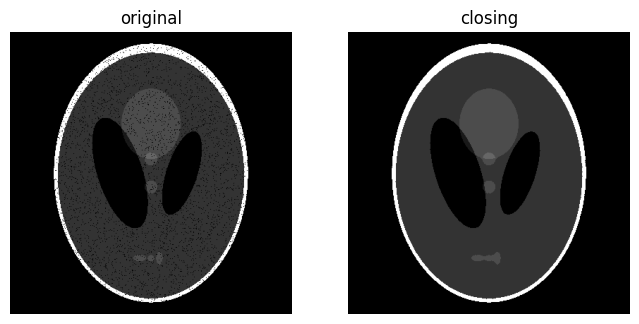

In [9]:
import skimage as ski
from skimage.morphology import closing

img = ski.util.random_noise(orig_phantom, mode='pepper', clip=True, amount=0.05)
eroded = closing(img, footprint)
plot_comparison(img, eroded, 'closing')

#### Hole Filling

Easily possible by iterative dilation and intersection

<img src="https://d3i71xaburhd42.cloudfront.net/9e97627fb972f138550d864406ed1001e075401b/5-Figure1-1.png" width="400">

#### Contour Extraction

- Simply $Dilate(IMG)-IMG$

There is another classical algorithm for border tracing (next lecture) but will skip.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0031320306003773-gr10.jpg">